In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Celerates MSIB/Tugas Akhir Celerates/Hasil_Akhir_Perubahan.csv')
df.shape

(499, 2)

In [5]:
df.head(10)

,text,sentiment
0,what a great day loks like dream,positive
1,i fel sory i mis you here in the sea beach,positive
2,dont angry me,negative
3,we atend in the clas just for listening teache...,negative
4,those who want to go let them go,negative
5,its night am feling neutral,neutral
6,am fedings for the baby are fun when he is al...,positive
7,so high,neutral
8,both of you,neutral
9,today first time i arive in the boat its amazi...,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       499 non-null    object
 1   sentiment  499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

,0
text,0
sentiment,0


In [8]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,199
positive,166
negative,134


In [9]:
# Memisahkan kolom teks dan sentimen
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [10]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Tampilkan ukuran data hasil split
print("Ukuran data setelah split:")
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")

Ukuran data setelah split:
x_train: (349,), x_test: (150,)


In [11]:
tf = TfidfVectorizer()

In [12]:
# Inisialisasi Random Forest sebagai classifier
classifier = SVC()

# Membuat pipeline dengan TfidfVectorizer dan Random Forest
model = Pipeline([('vectorizer', tf), ('classifier', classifier)])

# Melatih model
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [13]:
# evaluation
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       1.00      0.29      0.45        48
     neutral       0.45      0.98      0.61        48
    positive       0.94      0.54      0.68        54

    accuracy                           0.60       150
   macro avg       0.79      0.60      0.58       150
weighted avg       0.80      0.60      0.59       150



In [14]:
A=confusion_matrix(y_test,y_pred)
print(A)

[[14 33  1]
 [ 0 47  1]
 [ 0 25 29]]


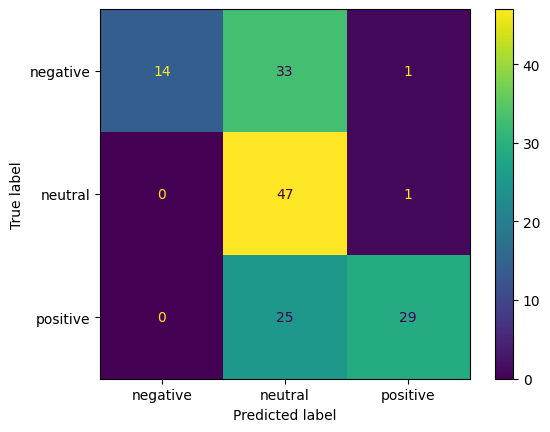

In [15]:
#Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)